In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

C:\Users\dsant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dsant\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\dsant\AppData\Local\Temp\ipykernel_2144\3708541975.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install pmdarima

     -------------------------------------- 615.0/615.0 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from pmdarima.arima import auto_arima

In [3]:
from xgboost import XGBRegressor

In [4]:
df = pd.read_excel('energy.xlsx', index_col="DATE", parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [5]:
df.shape


(408, 1)

In [6]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [7]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [8]:
df.columns=["producao"]

<AxesSubplot:xlabel='DATE'>

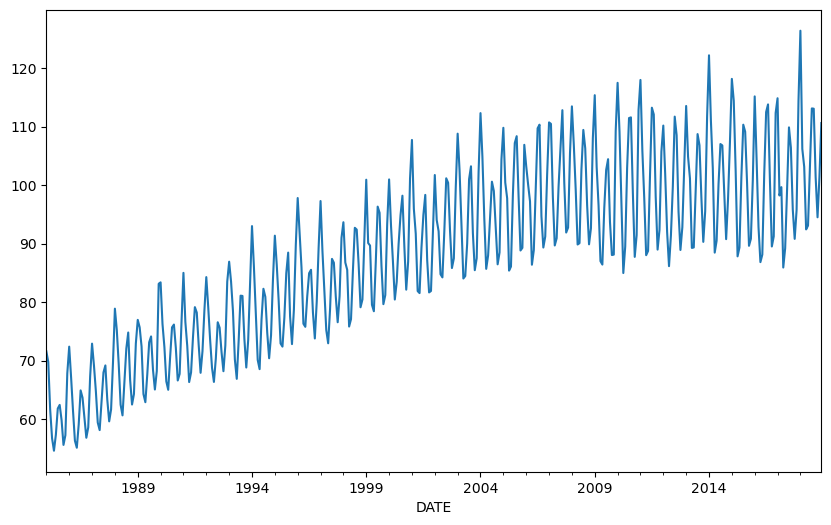

In [9]:
df["producao"].plot(figsize=(10,6))

### seasonal decomposition

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 800x600 with 0 Axes>

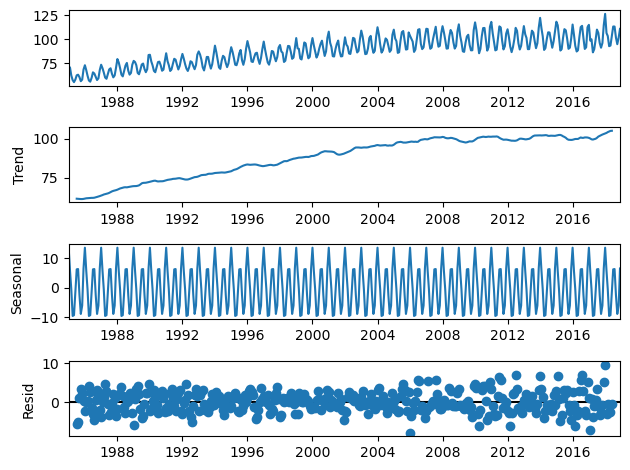

In [11]:
result = seasonal_decompose(df)

fig = plt.figure(figsize=(8,6))
fig = result.plot()

#### data (graph) above confirm a seasonality

### stationarity test

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
result = adfuller(df["producao"].dropna())
print(f"ADF Test:{result[0]}")
print(f"p value:{result[1]}")

# se p value > 5% is not a stationary trend

ADF Test:-2.252399047046608
p value:0.18777984601967346


#### The serie above is not stationary

In [16]:
result = adfuller(df["producao"].diff().dropna())
print(f"ADF Test:{result[0]}")
print(f"p value:{result[1]}")

ADF Test:-7.450892277526375
p value:5.674569955854434e-11


In [17]:
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, 
                       max_p=3, max_q=3, seasonal=True,
                       m=6, D=1, start_P=1, start_Q=1,
                       max_P=2, max_Q=2, 
                       information_criterions="aic", 
                       trace=True, 
                       error_action="ignore", 
                       stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=0.51 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.20 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=0.34 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=0.70 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=1.27 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=1.00 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.50 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=0.73 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=0.71 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=1.42 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

### test the model

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 2, 6))

result_sarimax = model.fit()

C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Mon, 19 Feb 2024   AIC                           1866.400
Time:                                        07:41:20   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.064      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.181      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### predictions

In [23]:
predictions = result_sarimax.get_prediction(start=-12)
mean_prediction = predictions.predicted_mean

In [24]:
# Confidence Interval
confidence_interval = predictions.conf_int()
down_limit = confidence_interval.iloc[:,0]
up_limit = confidence_interval.iloc[:,1]

down_limit[0], up_limit[0] 

C:\Users\dsant\AppData\Local\Temp\ipykernel_2144\1920620051.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  down_limit[0], up_limit[0]


(115.14474798330669, 124.45517785857372)

In [25]:
mean_prediction[0]

C:\Users\dsant\AppData\Local\Temp\ipykernel_2144\1650964497.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_prediction[0]


119.7999629209402

In [26]:
datas_preview = np.asarray(mean_prediction.index)
datas = np.asarray(df.index)

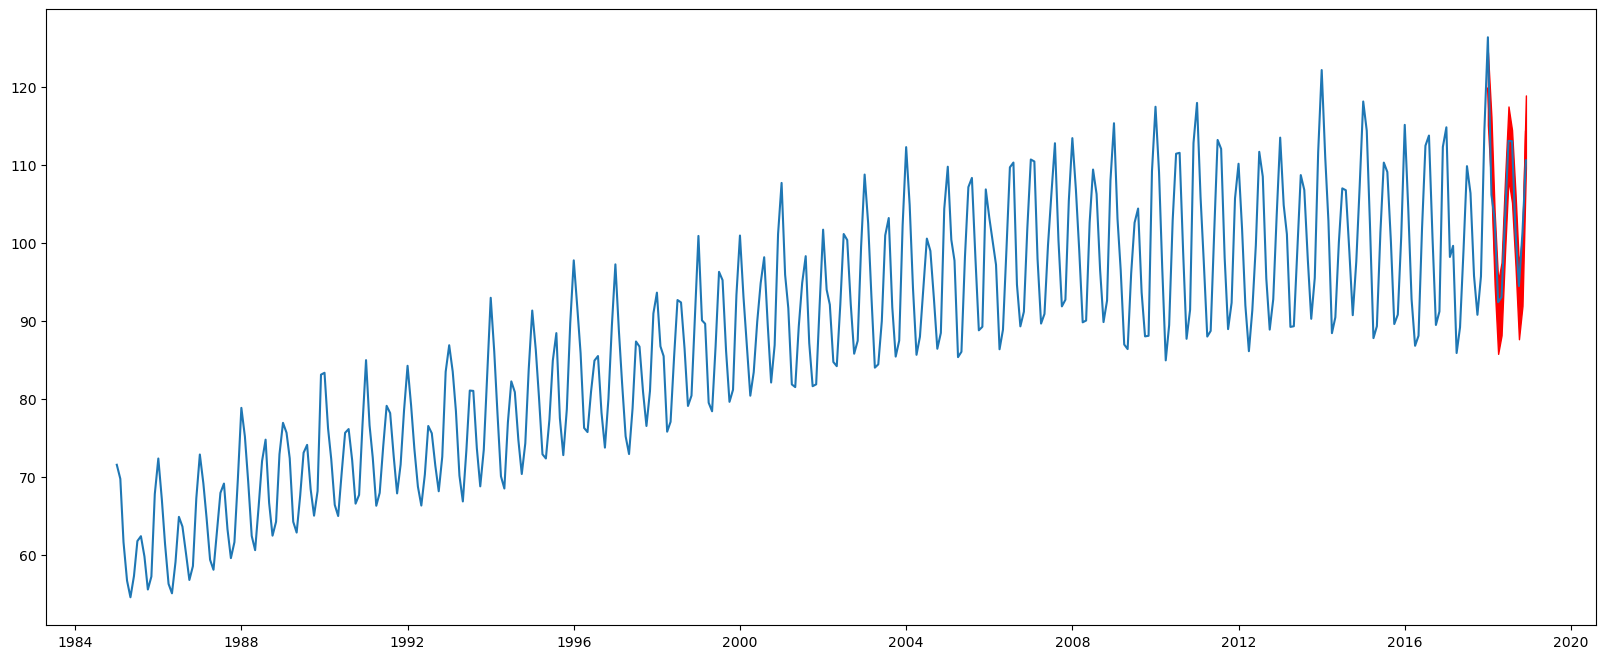

In [27]:
plt.figure(figsize=(20,8))
plt.plot(datas_preview, mean_prediction.values, color = "red", label="prediction")
plt.fill_between(datas_preview, down_limit, up_limit, color = "red")
plt.plot(datas, df.values, label="real")
plt.show()

### mean square error

In [28]:
from sklearn.metrics import mean_absolute_error

In [29]:
mae = mean_absolute_error(df[-12:].values, mean_prediction.values)
print(mae)

2.7071206701063253


### Forecast

In [30]:
forecast = result_sarimax.get_forecast(steps=12)
mean_forecast = forecast.predicted_mean
mean_forecast.size

12

In [31]:
confidence_interval_forecast = forecast.conf_int()
down_limit_f = confidence_interval_forecast.iloc[:,0]
up_limit_f = confidence_interval_forecast.iloc[:,1]

down_limit_f[10], up_limit_f[10] 

C:\Users\dsant\AppData\Local\Temp\ipykernel_2144\2588901864.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  down_limit_f[10], up_limit_f[10]


(91.38813142795122, 103.10930757058817)

In [32]:
mean_forecast[10]

C:\Users\dsant\AppData\Local\Temp\ipykernel_2144\1487087234.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_forecast[10]


97.2487194992697

In [70]:
datas_forecast = np.asarray(mean_forecast.index)
pred_datas = np.asarray(mean_prediction.index)

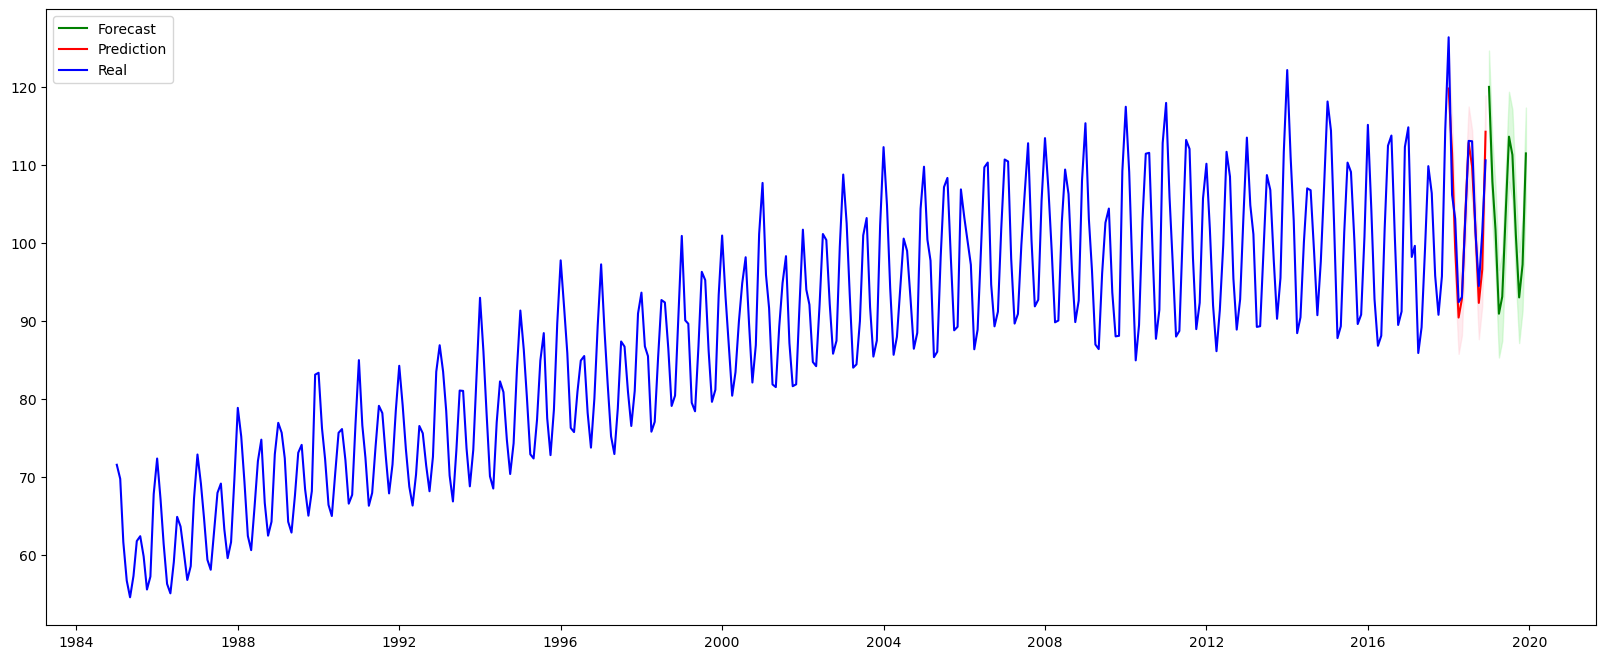

In [77]:
dates = np.asarray(df.index)

plt.figure(figsize=(20, 8
                   ))

# Plotting forecast
plt.plot(datas_forecast, mean_forecast.values, color="green", label="Forecast")
plt.fill_between(datas_forecast, down_limit_f, up_limit_f, color="lightgreen", alpha=0.3)

# Plotting prediction
plt.plot(datas_preview, mean_prediction.values, color="red", label="Prediction")
plt.fill_between(datas_preview, down_limit, up_limit, color="pink", alpha=0.3)

# Plotting real data
plt.plot(dates, df["producao"], color="blue", label="Real")

plt.legend(loc="upper left")
plt.show()

# New Data SET - Apple Stokes

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [54]:
dataset= pd.read_csv("price.csv")
dataset.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400


### Creating - Mean

In [55]:
dataset["Mean"] = (dataset["High"] + dataset["Low"]) / 2
dataset["Mean"].head(3)

0    3.924107
1    3.728393
2    3.591964
Name: Mean, dtype: float64

In [56]:
dataset.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964


In [ ]:
#The step function will cause each average value to be entered
#one line up in the new column called "Actual"

In [58]:
steps = -1
dataset_for_prediction = dataset.copy()
dataset_for_prediction["Actual"] = dataset_for_prediction["Mean"].shift(steps)
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143


### Deleting nulls

In [59]:
dataset_for_prediction = dataset_for_prediction.dropna()

### Date = Index

In [60]:
dataset_for_prediction["Date"] =pd.to_datetime(dataset_for_prediction["Date"])
dataset_for_prediction.index= dataset_for_prediction["Date"]

### Prediction
Plotting the average share value

Text(0.5, 1.0, 'Tyson Opening Stock Value')

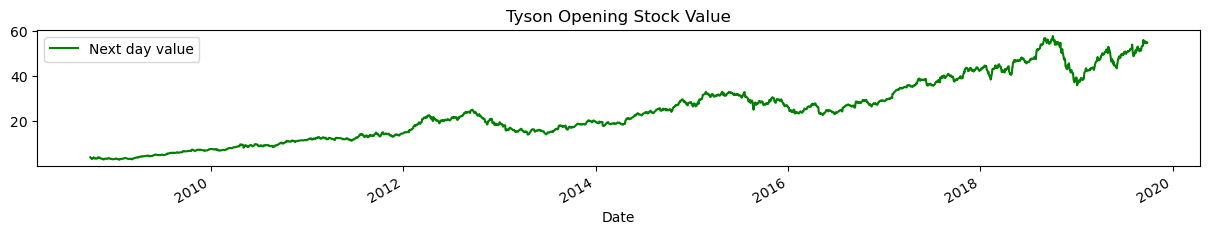

In [61]:
dataset_for_prediction["Mean"].plot(color="green", figsize=(15,2))
plt.legend(["Next day value", "Mean"])
plt.title("Tyson Opening Stock Value")


In [64]:
# Volume of shares sold

Text(0.5, 1.0, 'Apple Stock Volume')

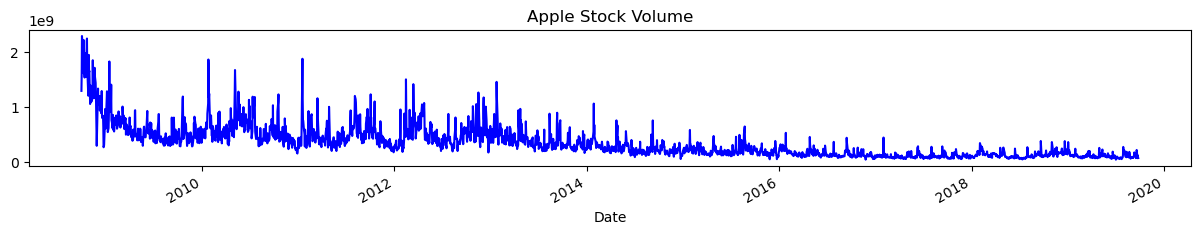

In [65]:
dataset_for_prediction["Volume"].plot(color="blue", figsize=(15,2))
plt.title("Apple Stock Volume")

### Seasonal - Tendency
Applying normalization to the base and separating the base into X and Y

In [66]:
import statsmodels.api as sm

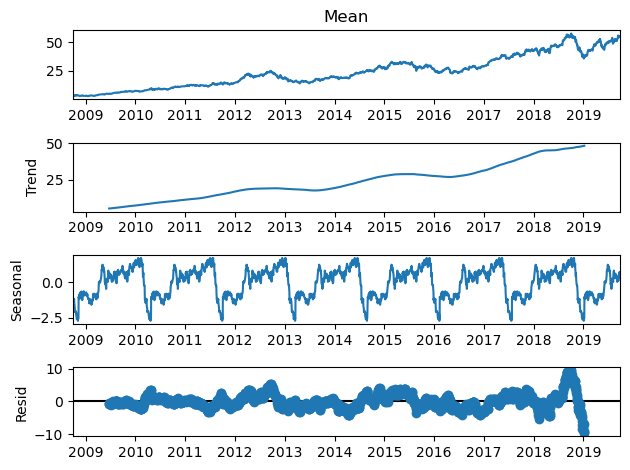

In [67]:
sd = sm.tsa.seasonal_decompose(dataset_for_prediction["Mean"], model="add", period=365)
fig=sd.plot()
plt.show()

#### Applying normalization to the base and separating the base into X and Y

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[["Low", "High","Open", "Close", "Volume", "Adj Close", "Mean"]])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [70]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[["Actual"]])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [71]:
X.rename(columns={0:"Low", 1:"High", 2:"Open", 3:"Close", 4:"Volume", 5:"Adj Close", 6:"Mean"}, inplace=True)
X.index=dataset_for_prediction.index
X.head(2)

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [72]:
y.rename(columns={0:"Stock Price next day"}, inplace= True)
y.index=dataset_for_prediction.index
y.head(2)

,Stock Price next day
Date,
2008-10-01,0.015763
2008-10-02,0.013284


### Split base into training and testing

In [47]:
train_size=int(len(dataset) *0.7)
test_size = int(len(dataset)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

### Understanding time series

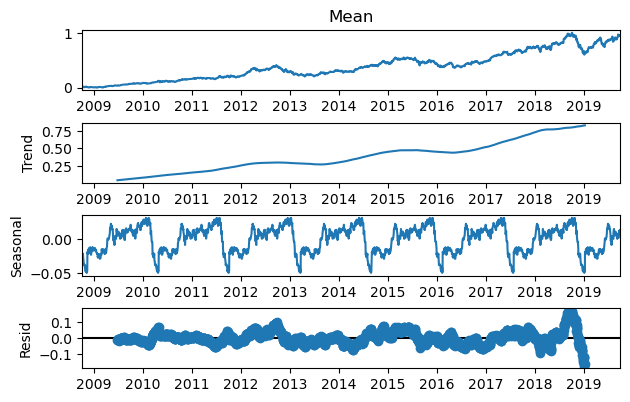

In [73]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X["Mean"],model="add",period=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

### Create a function to classify whether we should accept or reject the null hypothesis

In [77]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis – Stationary")
        print("Data is stationary", title)
    else:
        print("Strong evidence for the null hypothesis")
        print("Accept the null hypothesis - Stationary")
        print("Data is not stationary", title)

In [78]:
y_test=y["Stock Price next day"][:train_size].dropna()
test_adf(y_test, " Stock Price")

Strong evidence for the null hypothesis
Accept the null hypothesis - Stationary
Data is not stationary  Stock Price


In [79]:
test_adf(y_test.diff(), "Stock Price")

Strong evidence against the null hypothesis
Reject the null hypothesis – Stationary
Data is stationary Stock Price


Autocorrelation: Correlation coefficient between the current value and its past values. Analysis of this graph allows us to understand whether the series is random or has some trend or seasonality. With the values very close to 1, we come to the conclusion that this base has seasonality. The confidence interval by default is 95%, shown as this blue mark. Observations that fall outside the mark are considered statistically correlated.

C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


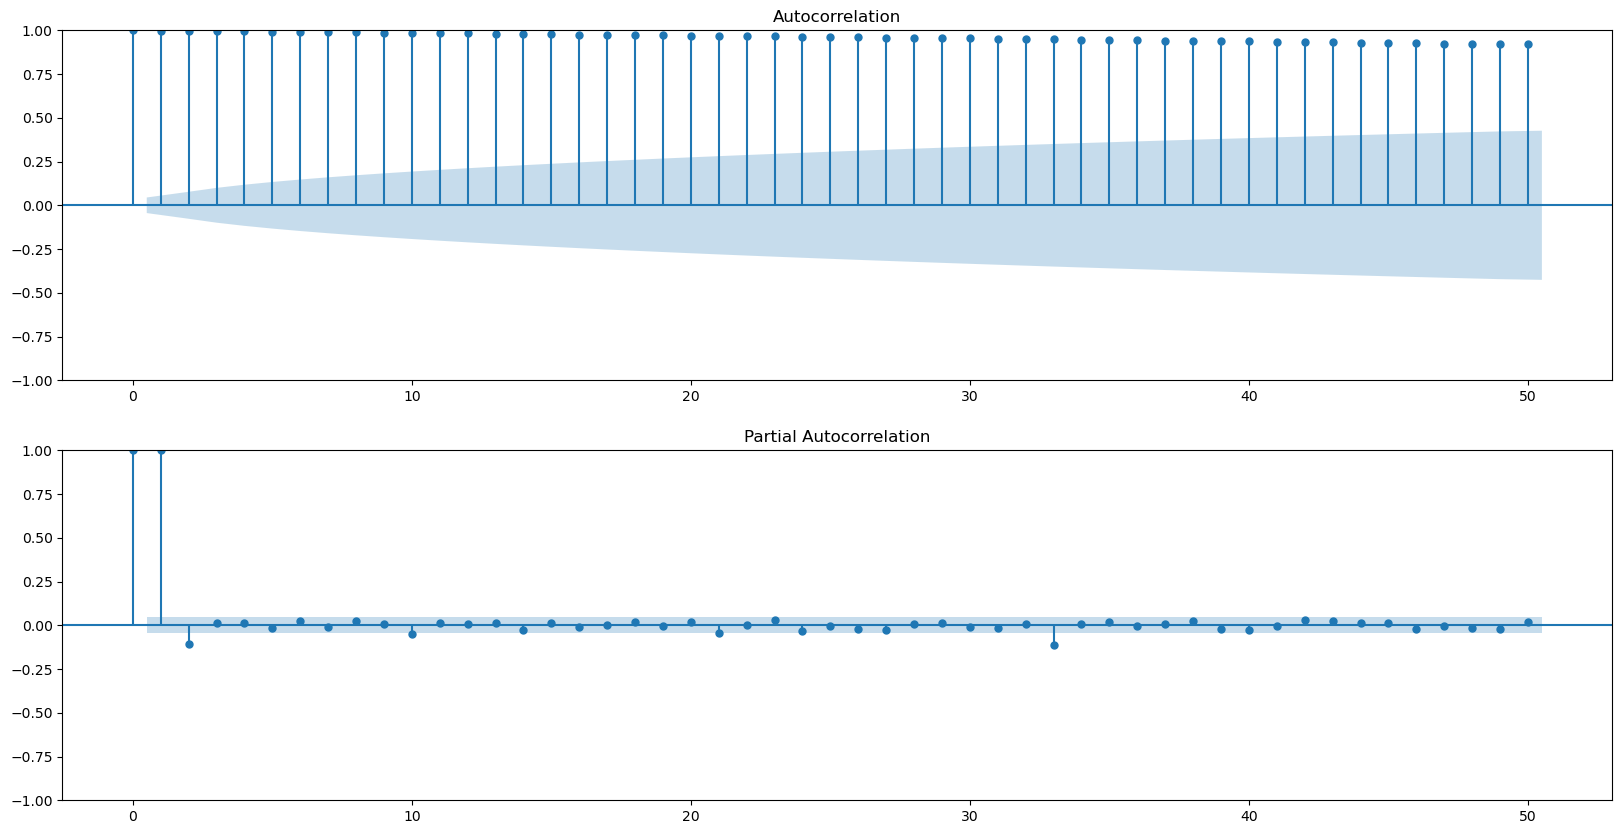

In [80]:
fig,ax= plt.subplots(2,1, figsize=(20,10))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [81]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
!pip install pmdarima


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from pmdarima.arima import auto_arima

In [86]:
for column in train_y.columns:
    step_wise = auto_arima(train_y[column], 
                            exogenous=train_X,
                            start_p=1, start_q=1, 
                            max_p=7, max_q=7, 
                            d=1, max_d=7,
                            trace=True, 
                            error_action="ignore", 
                            suppress_warnings=True, 
                            stepwise=True)
    print(step_wise.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14465.833, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14452.185, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14463.535, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14465.213, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14451.945, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14472.380, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-14470.168, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-14468.682, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14470.449, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14471.238, Time=1.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-14470.895, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-14466.308, Time=1.53 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-14471.835, Time=0.46 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 6.643 seco

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14551.262, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14551.277, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14552.629, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.577 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 0)   Log Likelihood                7278.496
Date:                Mon, 19 Feb 2024   AIC                         -14552.993
Time:                        09:27:36   BIC                         -14541.857
Sample:                             0   HQIC                        -14548.897
                               - 1936                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------

In [87]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7568.853
Date:                Mon, 19 Feb 2024   AIC                         -15131.706
Time:                        09:27:50   BIC                         -15115.002
Sample:                             0   HQIC                        -15125.562
                               - 1936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.407      0.160    -7.5e-05       0.000
ma.L1          0.1721      0.013     13.138      0.000       0.146       0.198
sigma2      2.339e-05   3.08e-07     75.957      0.000    2.28e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9186.97
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               8.07   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [93]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [94]:
models = []
for i in range(train_y.shape[1]):  # Iterate over the number of columns
    model = SARIMAX(train_y[:, i],  # Access each column by index
                    exog=train_X,
                    order=(0,1,1),
                    enforce_invertibility=False, 
                    enforce_stationarity=False)
    models.append(model.fit())

C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [95]:
results= model.fit()

C:\Users\dsant\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)

In [97]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

In [98]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])


In [99]:
act.index=test_X.index

In [100]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['Stock Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)

<AxesSubplot:xlabel='Date'>

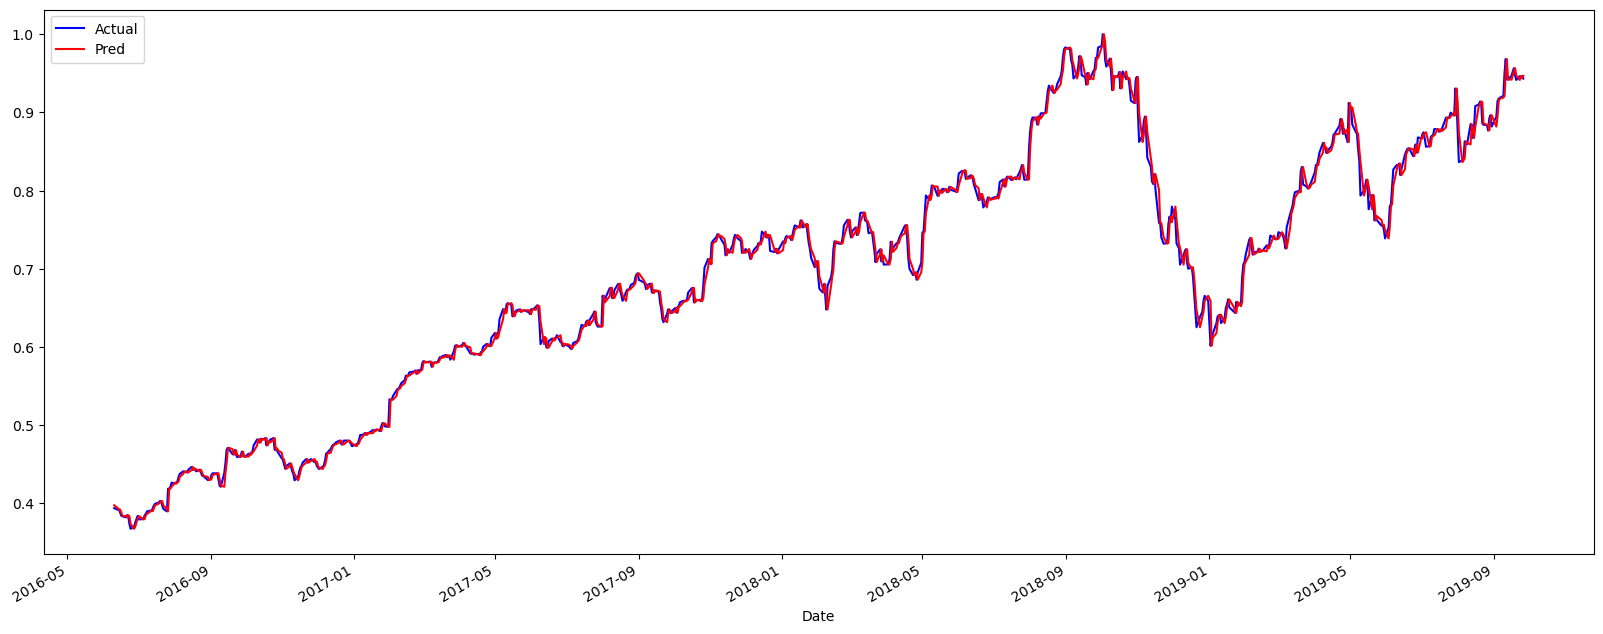

In [107]:
predictions["Actual"].plot(figsize=(20,10), legend=True, color="blue")
predictions["Pred"].plot(legend=True, color="red", figsize=(20,8))

In [102]:
actual= pd.DataFrame(scaler_output.iloc[train_size:, 0])
actual.index=test_X.index
actual.head()

,Stock Price next day
Date,
2016-06-10,0.393616
2016-06-13,0.391368
2016-06-14,0.391844
2016-06-15,0.388166
2016-06-16,0.383919


In [103]:
forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=test_X.index
forecast_apple["Actual"] = actual['Stock Price next day']
forecast_apple.rename(columns={0:"Forecast"}, inplace=True)

<AxesSubplot:xlabel='Date'>

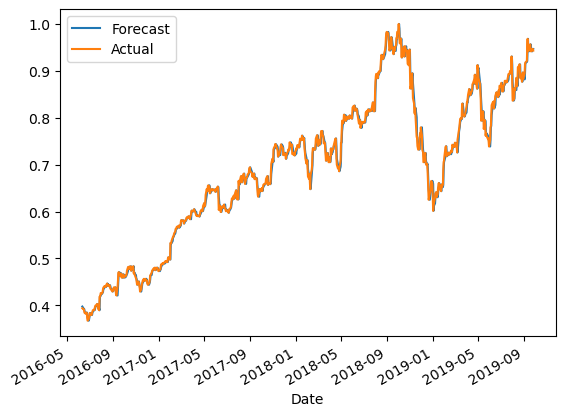

In [104]:
forecast_apple["Forecast"].plot(legend=True)
forecast_apple["Actual"].plot(legend=True)

In [105]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions["Pred"], predictions["Actual"])
error

0.010338184305903067

In [106]:
trainPredict = sc_out.inverse_transform(predictions[["Pred"]])
testPredict = sc_out.inverse_transform(predictions[["Actual"]])